## 决策树
由节点和对应的算法组成. <br>

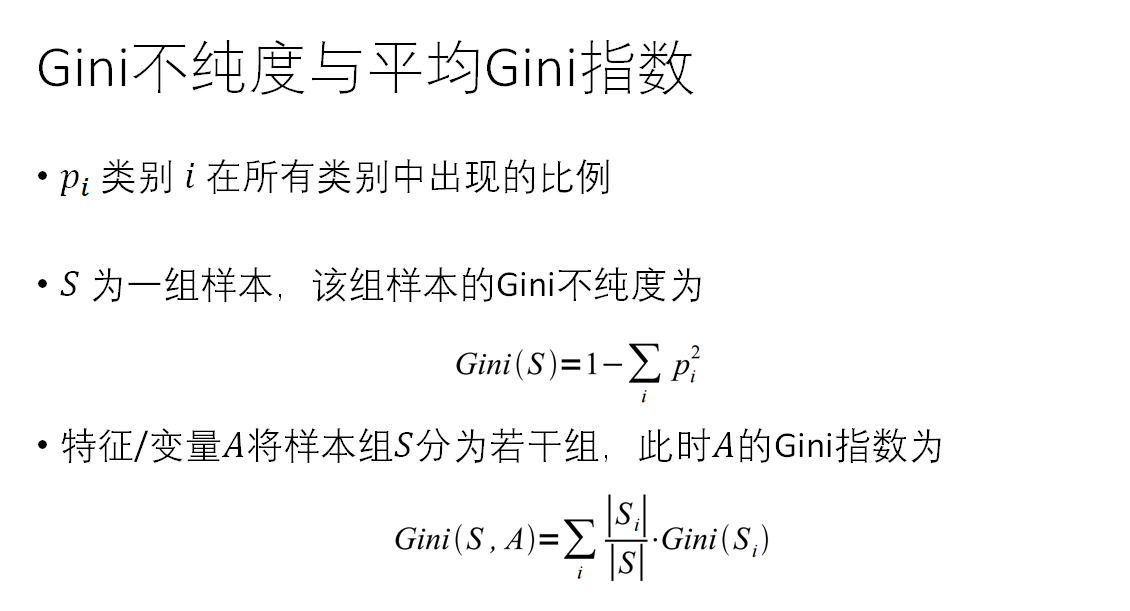

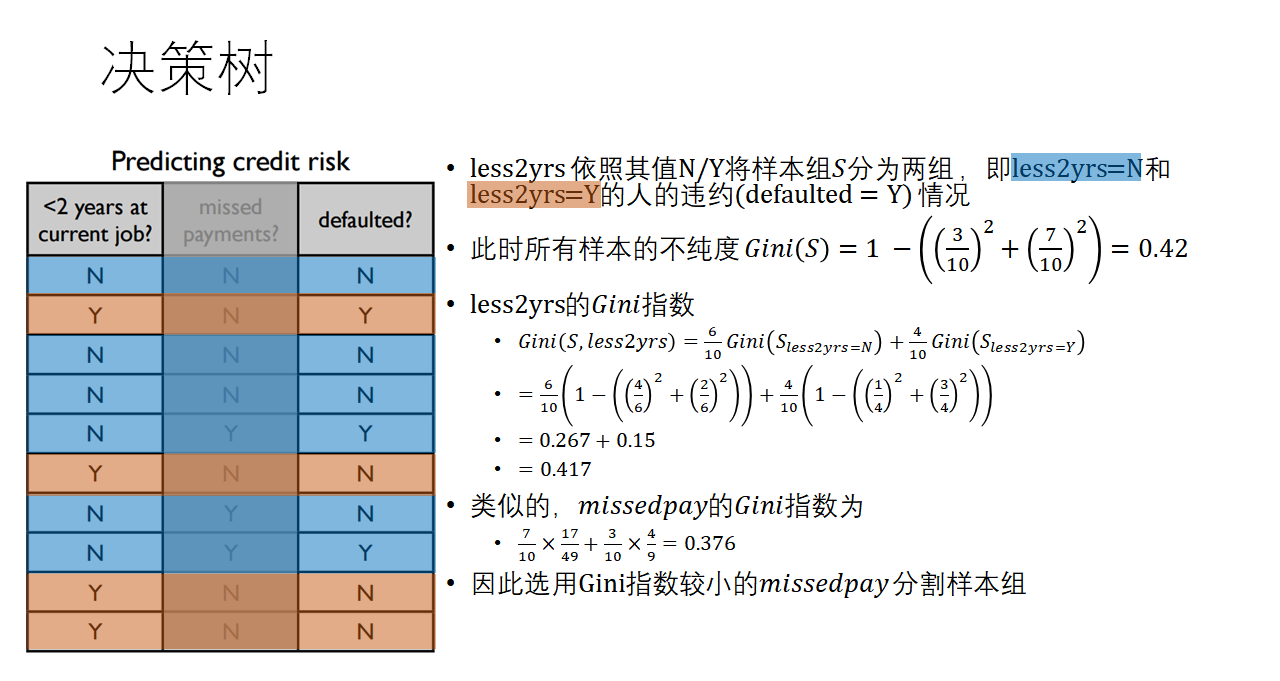

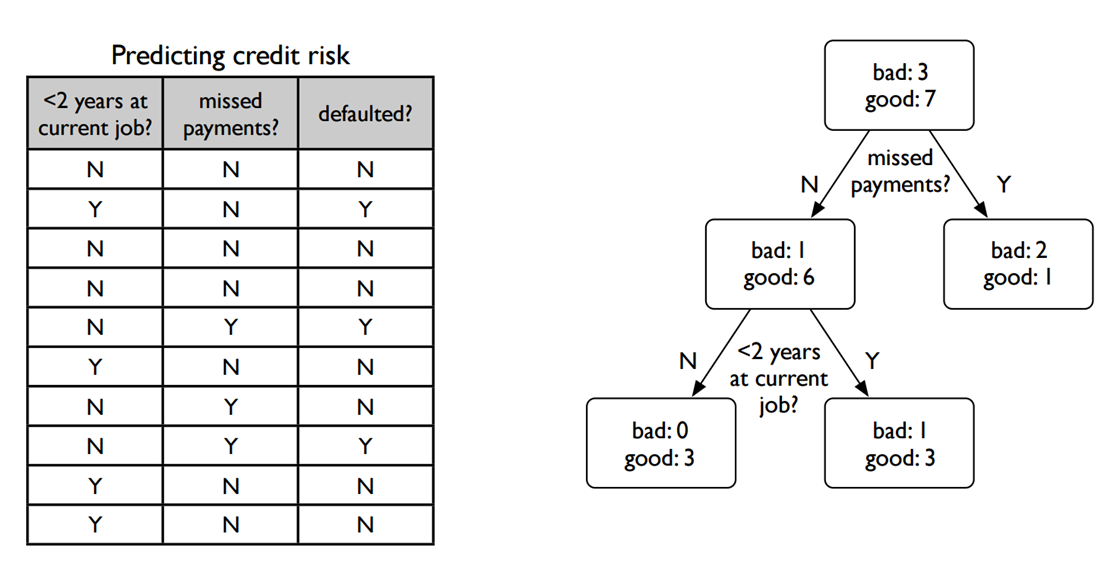

In [46]:
import pandas as pd
import numpy as np

credit = pd.read_excel('credit_risk.xlsx')
X = credit[['less2yrs', 'missedpay']].as_matrix()
y = credit['defaulted'].as_matrix()


def gini_impurity(y):
#   assume y are all integers
    p_i = np.bincount(y) / y.shape[0]
    return 1 - np.sum(p_i ** 2)


def gini_index(y_left, y_right):
    l_count, r_count = y_left.shape[0], y_right.shape[0]
    all_count = l_count + r_count
    
    l_imp = gini_impurity(y_left)
    r_imp = gini_impurity(y_right)
    
    return l_count/all_count * l_imp + r_count/all_count * r_imp


def get_best_split(X, y):
    min_gini_index = 1.0
    best_split = {}
    for i in range(X.shape[1]): 
        thresholds = np.unique(X[:, i])
        for th in thresholds:
            left_mask = X[:, i] <= th
            right_mask = X[:, i] > th

            gi = gini_index(y[left_mask], y[right_mask])
#             print('column=',i, 'thres=', th, 'gini_index=',gi)
            if gi < min_gini_index:
                min_gini_index = gi
                best_split = {'left mask':left_mask, 
                              'right mask':right_mask, 
                              'feature index':i, 
                              'threshold':th, 
                              'gini index':gi}
    return best_split


def leaf_label(y):
    return np.argmax(np.bincount(y))

class DecisionNode:
    def __init__(self, impurity=None):
        self.impurity = impurity
        self.feature_index = None
        self.threshold = None
        self.truebranch = None
        self.falsebranch = None
        self.label = None
    
    def __str__(self):
        return ' '.join(['imp=%s'%(self.impurity), 
                         'feature=%s'%(self.feature_index), 
                         'threshold=%s'%(self.threshold),
                         'label=%s'%(self.label),
                         '\n',
                         'left %s'%(self.truebranch),
                         'right %s'%(self.falsebranch)
                        ])
        
def build_tree(X, y):
    impurity = gini_impurity(y)
    node = DecisionNode(impurity=impurity)
    best_split = get_best_split(X, y)
    
    # 可以分叉
    if best_split['gini index'] < impurity:
        node.feature_index = best_split['feature index']
        node.threshold = best_split['threshold']
        left = best_split['left mask']
        right = best_split['right mask']
        node.truebranch = build_tree(X[left, :], y[left])
        node.falsebranch = build_tree(X[right, :], y[right])
    #不可再分, 叶子节点
    else:
        node.label = np.argmax(np.bincount(y))
    
    return node

def predict(tree, X):
    return [tree_predict(tree, row) for row in X]

def tree_predict(tree, x):
    # reached leaf
    if tree.label is not None:
        return tree.label
    
    prediction = None
    # node has branches
    # left? right?
    if x[tree.feature_index] <= tree.threshold:
        prediction = tree_predict(tree.truebranch, x)
    else:
        prediction = tree_predict(tree.falsebranch, x)
    return prediction
    

decisionTree = build_tree(X, y)
# print(decisionTree.truebranch)
y_pred = predict(decisionTree, X)
accuracy = (np.array(y_pred) ==  np.array(y) ).sum() / len(y)
accuracy


0.80000000000000004

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

decisionTree = build_tree(X_train, y_train)

y_pred = predict(decisionTree, X_test)

accuracy_score(y_test, y_pred)

0.95999999999999996

List/dict Comprehension

In [52]:
from sklearn.model_selection import train_test_split
train_test_split?

In [39]:
{i:i**2 for i in list(range(1, 11)) if i % 2 != 0}

{1: 1, 3: 9, 5: 25, 7: 49, 9: 81}

In [35]:
' a=%s hahaha' % (123)

' a=123 hahaha'

In [30]:
np.argmax(np.bincount([1,1,1,3,5,7]))

1

In [ ]:


class DecisionNode():
    def __init__(self, impurity=1.0):
        self.feature_index = None   # 从第几个feature分割数据集
        self.threshold = None       # 按照什么样的值分割数据集
        self.label = None           # 如果节点是叶子, node具有对应的标签
        self.true_branch = None     # 'Left' subtree
        self.false_branch = None    # 'Right' subtree
        self.impurity = impurity    # impurity最大是 1.0

        

        
    def __str__(self):
        return ' '.join(['feature %s,'%self.feature_index, 
                         'threshold %s,'%self.threshold, 
                         'impurity %s,'%self.impurity, 
                         'label %s'%self.label])
    
    def __repr__(self):
        return self.__str__()



max_depth = 0
# 生成决策树
def build_tree(X, y, depth=0):
    best_split = get_best_split(X, y)
    
    node = DecisionNode(impurity=gini_impurity(y))
    
    # if X,y can be split for lower impurity
    if (best_split['gini index'] < node.impurity) and (depth <= max_depth):
#         print(best_split['gini index'], node.impurity)
        
        node.feature_index = best_split['feature index']
        node.threshold = best_split['threshold']
        
        left, right = best_split['left mask'], best_split['right mask']
        
        node.true_branch =  build_tree(X[left], y[left], depth=depth+1)
        node.false_branch =  build_tree(X[right], y[right], depth=depth+1)
    else:
        node.label = 
        
    return node

# 利用决策树预测样本
def tree_predict(tree, x):
    pred = None
    if tree.label is not None:
        pred = tree.label
    else:
        if x[tree.feature_index] <= tree.threshold:
            pred = tree_predict(tree.true_branch, x)
        else:
            pred = tree_predict(tree.false_branch, x)
    return pred


def prediction(tree, X):
    y_pred = []
    for row in X:
        y_pred.append(tree_predict(dt, row))
    return y_pred


def accuracy(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (y_pred == y).sum()/y.shape[0]
    
dt = build_tree(X, y)

print(accuracy(y, prediction(dt, X)))

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

dt = build_tree(X_train, y_train)

print(accuracy(y_test, prediction(dt, X_test)))



In [9]:
import matplotlib.pyplot as plt
import pandas as pd
credit = pd.read_excel('credit_risk.xlsx')
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

mtrx = credit.as_matrix()
print(mtrx.shape)
x = mtrx[:, :-1]
y = mtrx[:, -1]

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x, y)
# requires additional installation of graphviz
file_name = 'credit_risk.dot'
tree.export_graphviz(clf, out_file=file_name, impurity=True, node_ids=True, 
                     class_names=['good', 'bad'], feature_names=credit.columns[[0,1]])
from subprocess import check_call
check_call(['dot', '-Tpng', file_name, '-o', file_name + '.png'])

(10, 3)


0

如果使用树做回归, 即$\mathbf{y} \in \mathbb{R}^m$ , $\mathbf{y}$为连续变量, 只需将impurity换成variance

In [10]:
def variance(y):
    return np.var(y)

    
def weighted_avg_var(y_left, y_right):
    l_count, r_count = y_left.shape[0], y_right.shape[0]
    all_count = l_count + r_count
    
    l_var = variance(y_left)
    r_var = variance(y_right)
    
    return l_count/all_count * l_var + r_count/all_count * r_var

def leaf_value(y):
    return np.mean(y)

In [7]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)


(506, 13)

In [ ]:
def get_best_split_regression(X, y):
    min_variance = variance(y)
    best_split = {}
    for i in range(X.shape[1]): 
        col = X[:, i]
        thresholds = np.unique(col)
        for th in thresholds:
            left_mask = col <= th
            right_mask =  col > th

            gi = gini_index(y[left_mask], y[right_mask])
#             print('column=',i, 'thres=', th, 'gini_index=',gi)
            if gi < min_gini_index:
                min_gini_index = gi
                best_split = {'left mask':left_mask, 
                              'right mask':right_mask, 
                              'feature index':i, 
                              'threshold':th, 
                              'gini index':gi}
    return best_split

max_depth = 4
# 生成决策树
def build_regression_tree(X, y, depth=0):
    best_split = get_best_split(X, y)
    
    node = DecisionNode(impurity=variance(y))
    
    # if X,y can be split for lower impurity
    if (best_split['gini index'] < node.impurity) and (depth <= max_depth):
#         print(best_split['gini index'], node.impurity)
        
        node.feature_index = best_split['feature index']
        node.threshold = best_split['threshold']
        
        left, right = best_split['left mask'], best_split['right mask']
        
        node.true_branch =  build_regression_tree(X[left], y[left], depth=depth+1)
        node.false_branch =  build_regression_tree(X[right], y[right], depth=depth+1)
    else:
        node.label = leaf_label(y)
        
    return node